In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import generacion_cartoon.utils.paths as path
import os
import generacion_cartoon.utils.funtions as funtions

2024-09-21 11:57:01.961879: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-21 11:57:02.045096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-21 11:57:02.080638: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-21 11:57:02.091297: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-21 11:57:02.146602: I tensorflow/core/platform/cpu_feature_guar

In [3]:
for name in ['train', 'test', 'validation']:
    if not path.data_processed_dir(name).exists():
        os.makedirs(path.data_processed_dir(name))


In [4]:
data_path = path.data_processed_dir('cartoon_png')
name_png = os.listdir(data_path)

In [5]:
train, val, test = funtions.split_dataset(name_png)

In [6]:
for name,lista in zip([train,test,val], ['train','test','validation']):
    funtions.move_files(
        path_source=data_path,
        path_destination=path.data_processed_dir(lista),
        name_list=name)

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


In [8]:
def make_dir_longname(name):
    list_dir = path.data_processed_dir(name)
    dir_name = [os.path.join(list_dir,name_file) for name_file in os.listdir(list_dir)]
    return dir_name

In [9]:
train_dir = make_dir_longname("train")
val_dir = make_dir_longname("validation")
test_dir = make_dir_longname("test")

In [10]:
train_ds = funtions.make_dataset(train_dir)
val_ds   = funtions.make_dataset(val_dir)
test_ds  = funtions.make_dataset(test_dir)


I0000 00:00:1726941424.833603    7276 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-21 11:57:04.929393: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
datasets = {
    "train": train_ds,
    "validation": val_ds,
    "test": test_ds
}

for name, ds in datasets.items():
    count = tf.data.experimental.cardinality(ds).numpy()
    print(f"Number of batches of 32 images {name}_ds: {count}")

Number of batches of 32 images train_ds: 250
Number of batches of 32 images validation_ds: 32
Number of batches of 32 images test_ds: 32


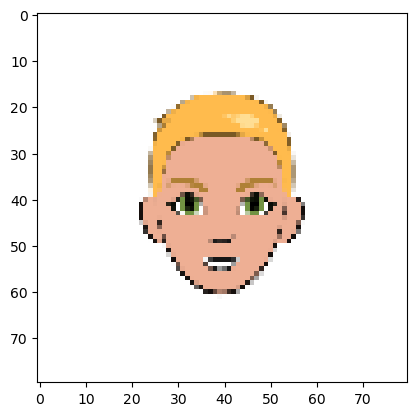

In [12]:
for i in train_ds:
    plt.imshow(i[0])
    plt.show()
    break